In [20]:
import numpy as py
import pandas as pd

data = pd.read_csv('kc1.csv')
print(f"Dataset Shape: {data.shape}")
data.head()

data2 = pd.read_csv('cm1.csv')

Dataset Shape: (2109, 22)


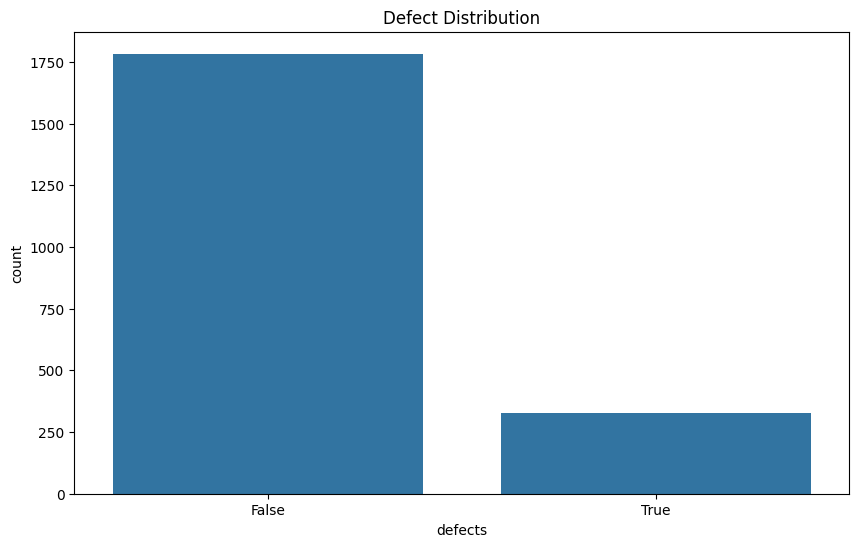

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='defects', data=data)
plt.title('Defect Distribution')
plt.show()

In [21]:
from imblearn.over_sampling import SMOTE

#applying smote
def apply_smote(df):
    X = df.drop('defects', axis=1)
    y = df['defects']
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    df_res = pd.DataFrame(X_res, columns=X.columns)
    df_res['defects'] = y_res
    return df_res

# Apply SMOTE to each dataset
data_bal = apply_smote(data)
data2_bal = apply_smote(data2)

Dataset Shape: (3566, 22)


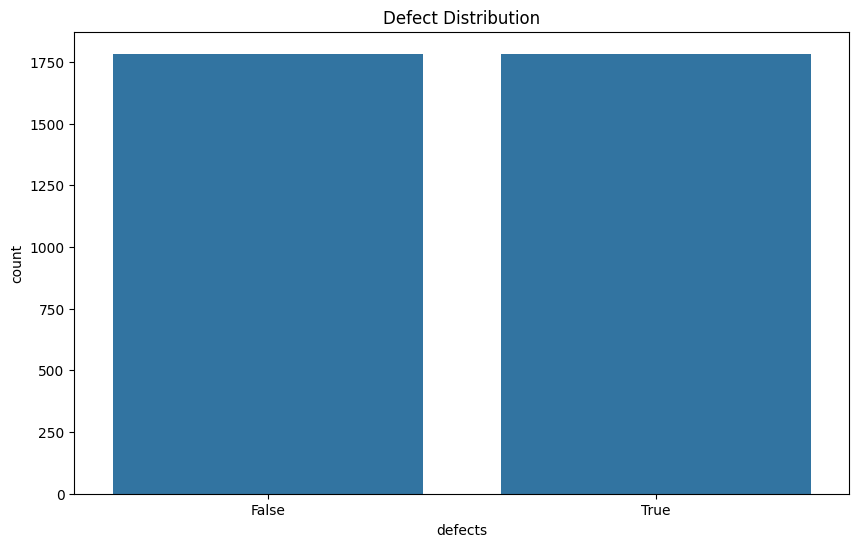

In [5]:
print(f"Dataset Shape: {data_bal.shape}")
# Data Visualization df1
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='defects', data=data_bal)
plt.title('Defect Distribution')
plt.show()

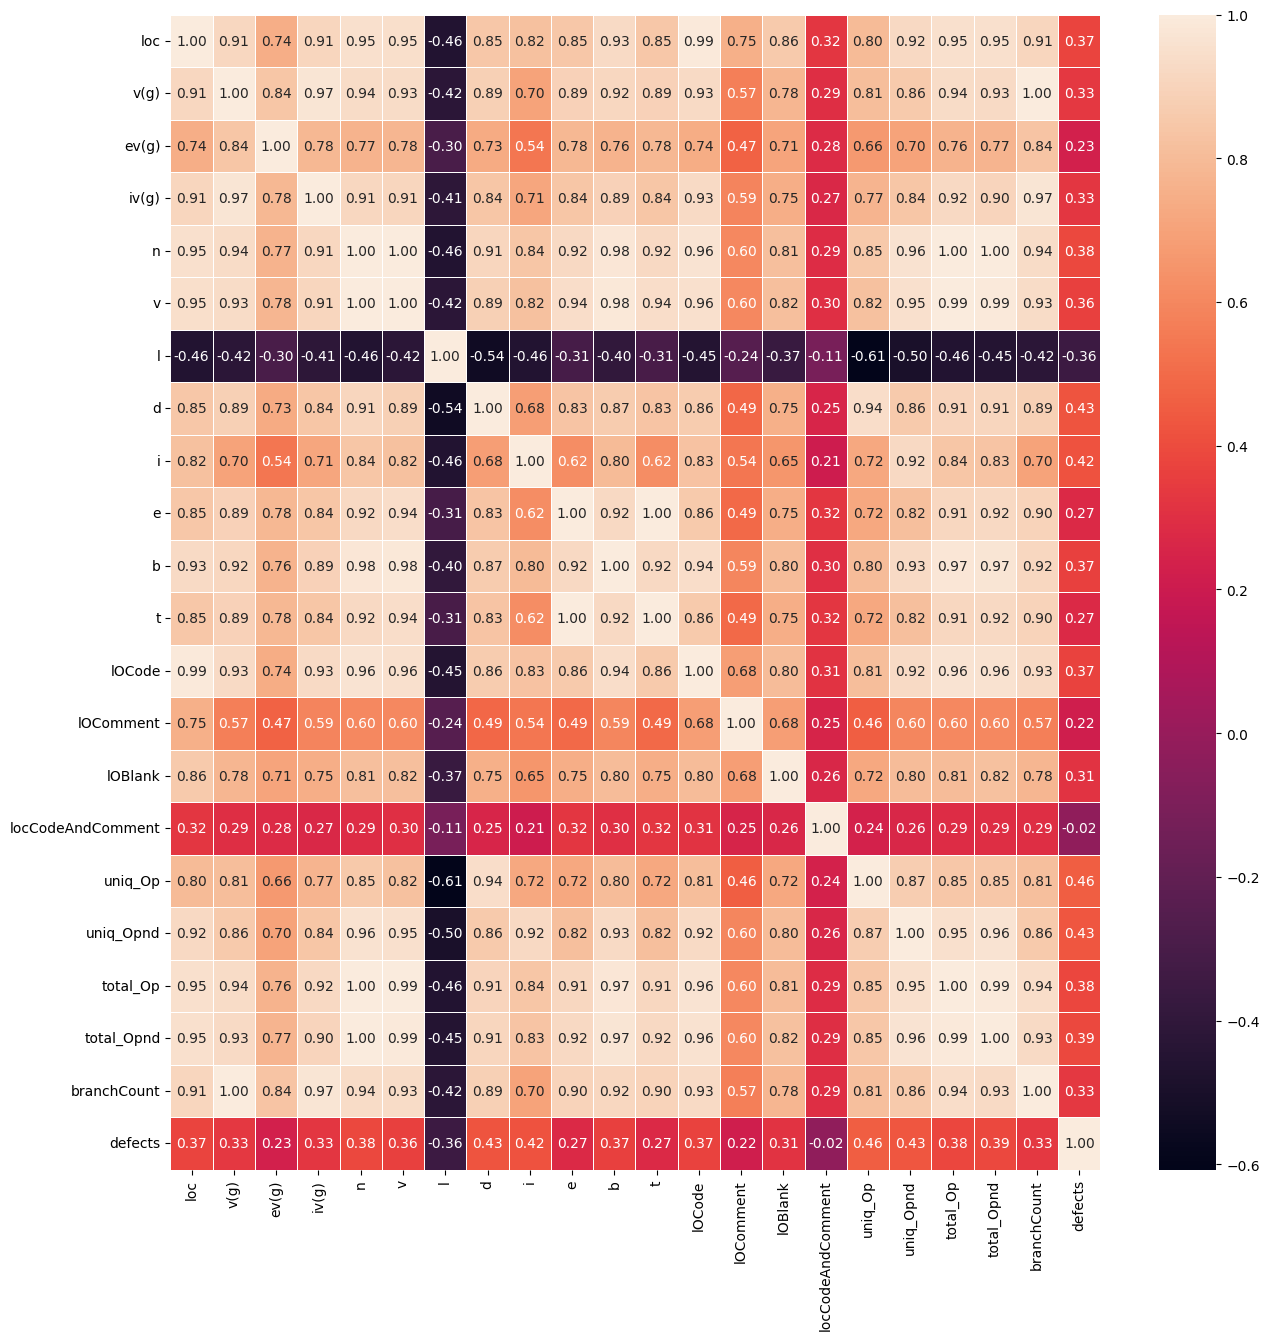

In [6]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data_bal.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler
X = data_bal.drop('defects', axis=1)
y = data_bal['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform(X_train)  # Use this instead of raw X
X_test_Scaled  = scaler.fit_transform(X_test)
model = svm.SVC(kernel='linear', C=0.01)
model.fit(X_Train_scaled, y_train)
y_pred = model.predict(X_test_Scaled)

Model Accuracy: 73.52941176470588

Classification Report:
              precision    recall  f1-score   support

       False       0.72      0.74      0.73       351
        True       0.75      0.73      0.74       363

    accuracy                           0.74       714
   macro avg       0.74      0.74      0.74       714
weighted avg       0.74      0.74      0.74       714


Confusion Matrix:
[[261  90]
 [ 99 264]]


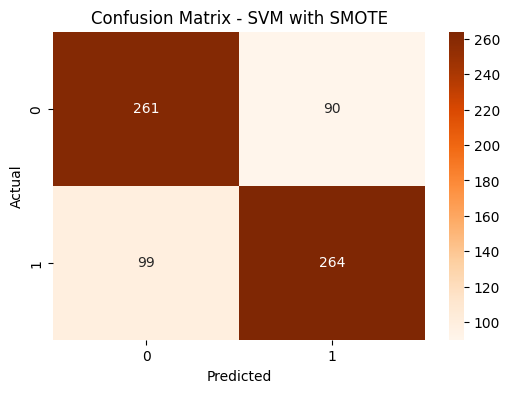

In [8]:
# Model Evaluation
print("Model Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - SVM with SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.89      0.91       351
        True       0.90      0.93      0.91       363

    accuracy                           0.91       714
   macro avg       0.91      0.91      0.91       714
weighted avg       0.91      0.91      0.91       714

✅ Accuracy on Test Set: 0.9117647058823529


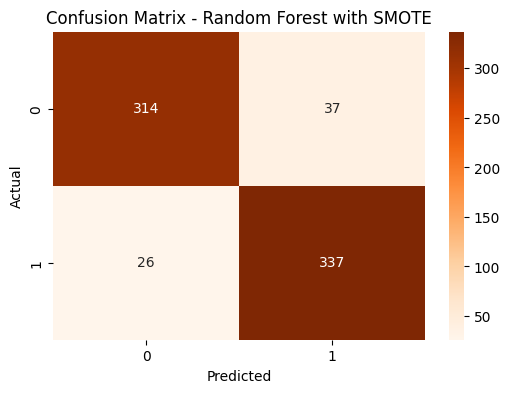

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("✅ Accuracy on Test Set:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Random Forest with SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# import joblib
# joblib.dump(rf_model, 'random_fo.pkl')



Logistic Regression Accuracy : 0.7478991596638656

📋 Classification Report:
               precision    recall  f1-score   support

       False       0.74      0.76      0.75       351
        True       0.76      0.74      0.75       363

    accuracy                           0.75       714
   macro avg       0.75      0.75      0.75       714
weighted avg       0.75      0.75      0.75       714



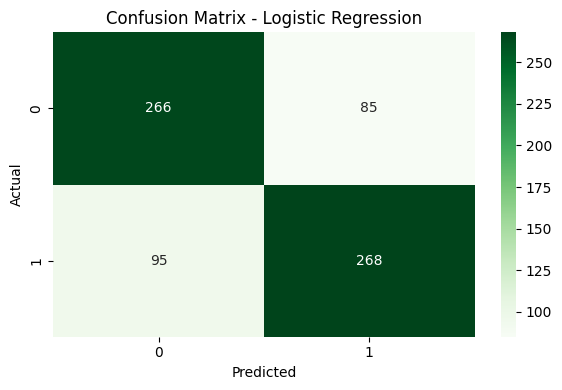

In [10]:
from sklearn.linear_model import LogisticRegression
X = data.drop('defects', axis=1)
y = data['defects']

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform(X_train)  # Use this instead of raw X
X_test_Scaled  = scaler.fit_transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_Train_scaled, y_train)


# Predict and evaluate
y_pred = model.predict(X_test_Scaled)

# Print accuracy and classification report
print("Logistic Regression Accuracy :", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Show Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

✅ Accuracy on Test Set: 0.9005602240896359

📋 Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.91      0.90       351
        True       0.91      0.89      0.90       363

    accuracy                           0.90       714
   macro avg       0.90      0.90      0.90       714
weighted avg       0.90      0.90      0.90       714



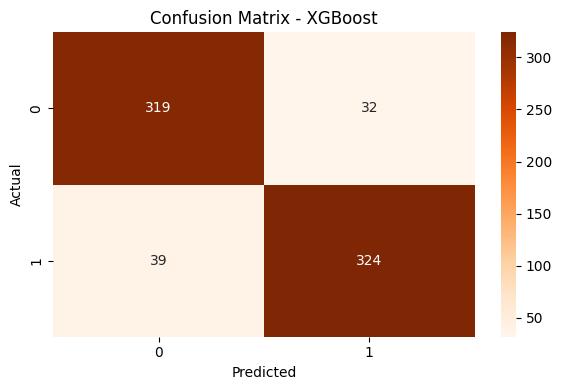

In [11]:
X = data_bal.drop('defects', axis=1)
y = data_bal['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluation
print("✅ Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


📋 Classification Report:
              precision    recall  f1-score   support

       False       0.59      0.90      0.71       351
        True       0.81      0.39      0.53       363

    accuracy                           0.64       714
   macro avg       0.70      0.65      0.62       714
weighted avg       0.70      0.64      0.62       714

✅ Accuracy: 0.6442577030812325


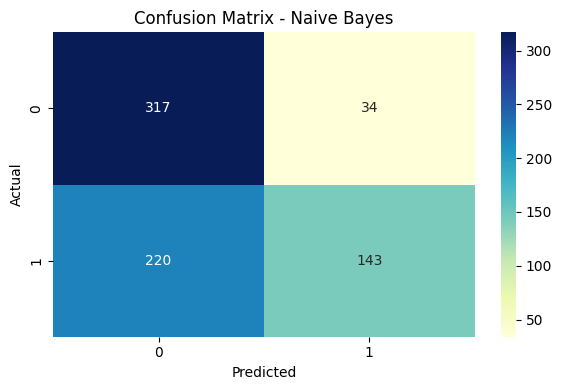

In [18]:
from sklearn.naive_bayes import GaussianNB
X = data_bal.drop('defects', axis=1)
y = data_bal['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("📋 Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Model Accuracy: 65.81291759465479

Classification Report:
              precision    recall  f1-score   support

       False       0.66      0.66      0.66       449
        True       0.66      0.65      0.66       449

    accuracy                           0.66       898
   macro avg       0.66      0.66      0.66       898
weighted avg       0.66      0.66      0.66       898


Confusion Matrix:
[[297 152]
 [155 294]]


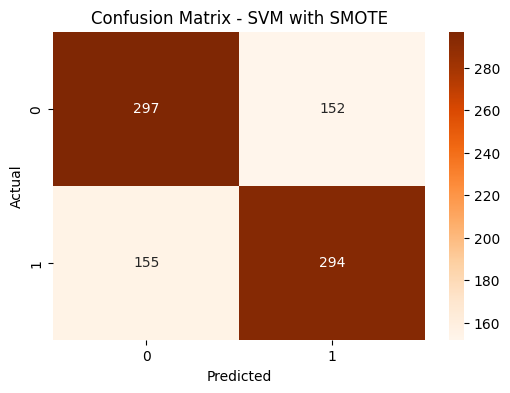

In [23]:
X_train = data_bal.drop(columns=['defects'])
y_train = data_bal['defects']

X_test = data2_bal.drop(columns=['defects'])
y_test = data2_bal['defects']
scaler = StandardScaler()
X_Train_scaled = scaler.fit_transform(X_train)  # Use this instead of raw X
X_test_Scaled  = scaler.fit_transform(X_test)
model = svm.SVC(kernel='linear', C=0.01)
model.fit(X_Train_scaled, y_train)
y_pred = model.predict(X_test_Scaled)
# Model Evaluation
print("Model Accuracy:", accuracy_score(y_test, y_pred)*100)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - SVM with SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.59      0.68       449
        True       0.68      0.85      0.75       449

    accuracy                           0.72       898
   macro avg       0.74      0.72      0.72       898
weighted avg       0.74      0.72      0.72       898

✅ Accuracy on Test Set: 0.720489977728285


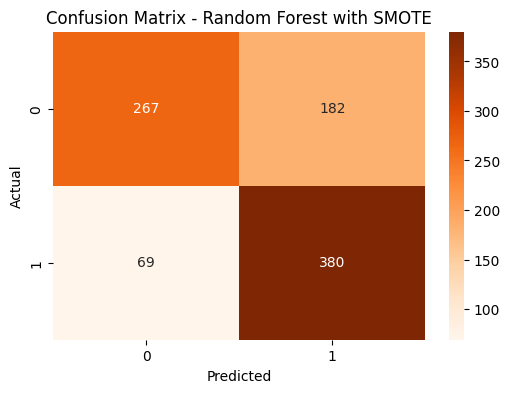

In [24]:
X_train = data_bal.drop(columns=['defects'])
y_train = data_bal['defects']

X_test = data2_bal.drop(columns=['defects'])
y_test = data2_bal['defects']
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model1.fit(X_train, y_train)

# Predict
y_pred = rf_model1.predict(X_test)

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("✅ Accuracy on Test Set:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Random Forest with SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

✅ Accuracy on Test Set: 0.7115812917594655

📋 Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.49      0.63       449
        True       0.65      0.93      0.76       449

    accuracy                           0.71       898
   macro avg       0.76      0.71      0.70       898
weighted avg       0.76      0.71      0.70       898



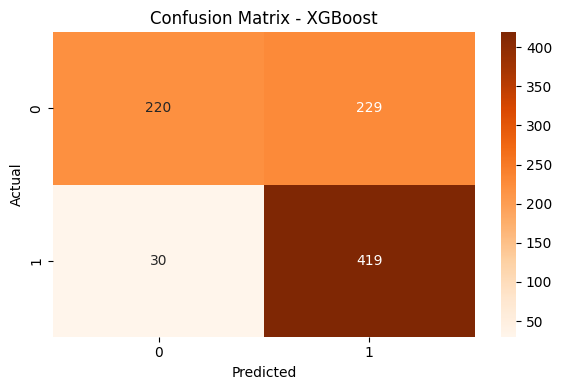

In [25]:
X_train = data_bal.drop(columns=['defects'])
y_train = data_bal['defects']

X_test = data2_bal.drop(columns=['defects'])
y_test = data2_bal['defects']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluation
print("✅ Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()